# Data

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

In [8]:
import kagglehub

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

100%|██████████| 6.18k/6.18k [00:00<00:00, 8.29MB/s]

Extracting files...


In [9]:
heart = pd.read_csv(path + "/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
heart.rename(columns={'thalach': 'max_heart_rate', 'cp': 'chest_pain', 'trestbps': 'resting_bp', 'ca':'vessels', 'oldpeak':'st_dep'}, inplace=True)
heart.head()

,age,sex,chest_pain,resting_bp,chol,fbs,restecg,max_heart_rate,exang,st_dep,slope,vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
X = heart.drop(columns="target")
y = heart["target"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
ohe = OneHotEncoder(drop='if_binary')
scaler = StandardScaler()

transformer = make_column_transformer(
    (scaler, ['age', 'resting_bp', 'chol', 'st_dep', 'max_heart_rate', 'vessels']),
 (ohe, ['sex', 'chest_pain', 'fbs', 'restecg', 'exang', 'slope', 'thal']),
    remainder = 'passthrough',
    verbose_feature_names_out=False)


# MODELS

In [14]:
lgr = LogisticRegression()

lgr_pipe = Pipeline([('encode', transformer),
                       ('model', lgr)])

In [15]:
lgr_pipe.fit(X_train, y_train)

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'resting_bp', 'chol',
                                                   'st_dep', 'max_heart_rate',
                                                   'vessels']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex', 'chest_pain', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])],
                                   verbose_feature_names_out=False)),
                ('model', LogisticRegression())])

In [16]:
lgr_pipe.score(X_test, y_test)

0.8195121951219512

In [48]:
forest = RandomForestClassifier()

In [49]:
grid_pipe = Pipeline([('transformer', transformer), ('model', forest)])
params = {'model__n_estimators': [10, 50, 100],
          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
          }

In [50]:
tree_grid = GridSearchCV(grid_pipe, param_grid = params)

In [51]:
tree_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'resting_bp',
                                                                          'chol',
                                                                          'st_dep',
                                                                          'max_heart_rate',
                                                                          'vessels']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex',
                                                                          'chest_pain',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'exang',
                                                                          'slope',
                                                                          'thal'])],
                                                          verbose_feature_names_out=False)),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__n_estimators': [10, 50, 100]})

In [52]:
tree_grid.score(X_test, y_test)

0.8048780487804879

In [22]:
import xgboost as xgb

In [23]:
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)

In [24]:
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
test_score = clf.score(X_test, y_test)

[0]	validation_0-logloss:0.54692
[1]	validation_0-logloss:0.44181
[2]	validation_0-logloss:0.36952
[3]	validation_0-logloss:0.33023
[4]	validation_0-logloss:0.29208
[5]	validation_0-logloss:0.25400
[6]	validation_0-logloss:0.22442
[7]	validation_0-logloss:0.20481
[8]	validation_0-logloss:0.18950
[9]	validation_0-logloss:0.16863
[10]	validation_0-logloss:0.15313
[11]	validation_0-logloss:0.14437
[12]	validation_0-logloss:0.13709
[13]	validation_0-logloss:0.13258
[14]	validation_0-logloss:0.12906
[15]	validation_0-logloss:0.12203
[16]	validation_0-logloss:0.11308
[17]	validation_0-logloss:0.11245
[18]	validation_0-logloss:0.10868
[19]	validation_0-logloss:0.10547
[20]	validation_0-logloss:0.10414
[21]	validation_0-logloss:0.10188
[22]	validation_0-logloss:0.09836
[23]	validation_0-logloss:0.09830
[24]	validation_0-logloss:0.09787
[25]	validation_0-logloss:0.09516
[26]	validation_0-logloss:0.09662
[27]	validation_0-logloss:0.09646


In [25]:
test_score

0.9853658536585366

# COEFFICIENTS

In [43]:
lr = lgr_pipe.named_steps['model']
coefficients = pd.DataFrame(lr.coef_).T
names = pd.DataFrame(transformer.get_feature_names_out())
pd.concat([names, coefficients], axis = 1)

,0,0
0,age,0.029895
1,resting_bp,-0.256990
2,chol,-0.437566
3,st_dep,-0.668063
4,max_heart_rate,0.500367
5,vessels,-0.872395
6,sex_1,-1.445454
7,chest_pain_0,-1.267020
8,chest_pain_1,0.005340
9,chest_pain_2,0.466574


In [27]:
tree_grid.best_params_

{'model__max_depth': 2, 'model__n_estimators': 10}

In [28]:
forest = tree_grid.best_estimator_

In [29]:
r = permutation_importance(forest, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist()).sort_values(by = 0, ascending = False)

,0
thal,0.135122
chest_pain,0.034634
chol,0.011707
max_heart_rate,0.009756
vessels,0.006341
sex,0.005366
st_dep,0.003902
slope,0.002439
restecg,0.001951
fbs,0.000000


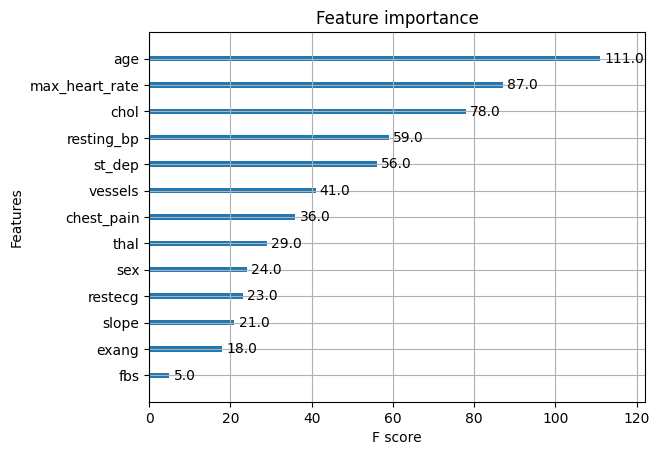

In [57]:
from xgboost import plot_importance

plot_importance(clf)
plt.show()

# CONFUSION MATRIX

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

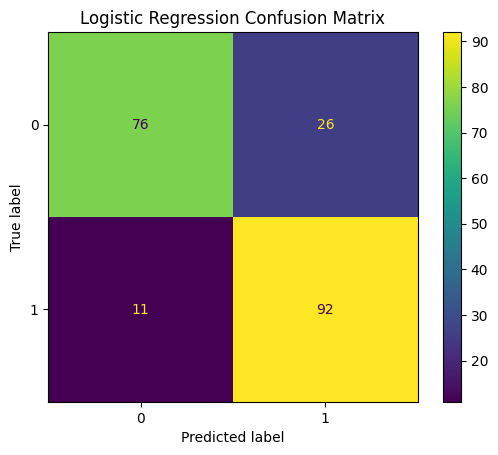

In [31]:
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test);
plt.title('Logistic Regression Confusion Matrix');

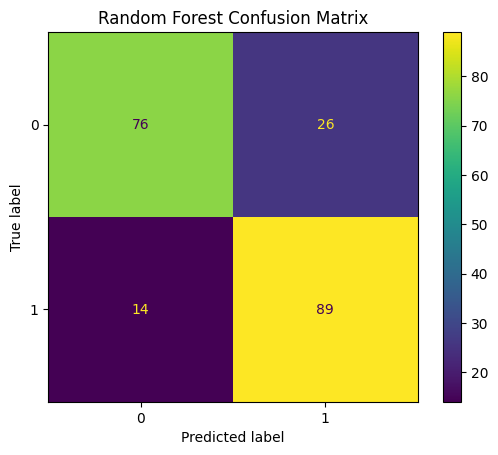

In [53]:
ConfusionMatrixDisplay.from_estimator(tree_grid, X_test, y_test);
plt.title('Random Forest Confusion Matrix');

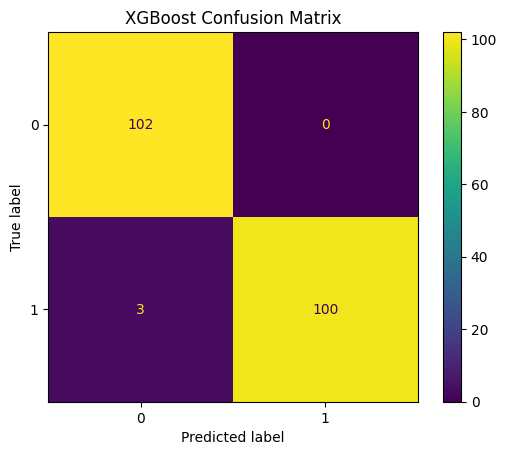

In [45]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);
plt.title('XGBoost Confusion Matrix');

# MISC

In [34]:
# for i in range(1, 14):
#   forest_pipe = Pipeline([('transformer', transformer),
#                        ('model', RandomForestClassifier(max_depth=i))])
#   forest_pipe.fit(X_train, y_train)

In [35]:
# train_scores = []
# test_scores = []
# for d in range(1, 20):
#     forest_pipe = Pipeline([('transformer', transformer),
#                        ('model', RandomForestClassifier(max_depth=d))])
#     dtree= forest_pipe.fit(X_train, y_train)
#     y_train_preds = dtree.predict(X_train)
#     y_test_preds = dtree.predict(X_train)
#     train_scores.append(forest_pipe.score(X_train, y_train))
#     test_scores.append(forest_pipe.score(X_test, y_test))

# plt.plot(range(1, 20), train_scores, '--o', label = 'train')
# plt.plot(range(1, 20), test_scores, '--o', label = 'test')
# plt.grid()
# plt.legend()
# plt.xticks(range(1, 20))
# plt.xlabel('Max Tree Depth')
# plt.ylabel('Score')
# plt.title('Decision Tree Depth vs. Test/Train Accuracy');

In [36]:
# forest_pipe.fit(X_train, y_train)

In [37]:
# forest_pipe.score(X_test, y_test)